# Danalitic Programming Test
# Submitted by: Ankit Verma

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import ast

## Load Production Logs Data

In [2]:
production_logs_columns=['Production_Unit_Id','Batch_Id','Items_produced','Items_discarded']
Production=pd.read_csv('Production_logs (1).tsv',sep='\t',names=production_logs_columns)
Production.head()

,Production_Unit_Id,Batch_Id,Items_produced,Items_discarded
0,P188,gv962,"{'scissor': 141, 'paper': 274, 'rock': 218}","{'scissor': 14, 'paper': 135, 'rock': 24}"
1,P258,mr005,"{'scissor': 151, 'paper': 143, 'rock': 225}","{'scissor': 24, 'paper': 60, 'rock': 17}"
2,P986,um425,"{'scissor': 156, 'paper': 151, 'rock': 84}","{'scissor': 61, 'paper': 116, 'rock': 28}"
3,P631,fy268,"{'scissor': 91, 'paper': 203, 'rock': 161}","{'scissor': 23, 'paper': 17, 'rock': 9}"
4,P675,jq381,"{'scissor': 85, 'paper': 226, 'rock': 223}","{'scissor': 57, 'paper': 141, 'rock': 118}"


### Extracting Number of Different Items Produced in Each Batch

In [3]:
df = Production['Items_produced'].astype('str')
df = df.apply(lambda x: ast.literal_eval(x))
df = df.apply(pd.Series)
Production=pd.merge(Production, df, left_index=True, right_index=True)
Production.rename(columns={"scissor": "Scissors_Produced", "paper": "Papers_Produced","rock":"Rocks_Produced"},inplace=True)
Production.head()

,Production_Unit_Id,Batch_Id,Items_produced,Items_discarded,Scissors_Produced,Papers_Produced,Rocks_Produced
0,P188,gv962,"{'scissor': 141, 'paper': 274, 'rock': 218}","{'scissor': 14, 'paper': 135, 'rock': 24}",141,274,218
1,P258,mr005,"{'scissor': 151, 'paper': 143, 'rock': 225}","{'scissor': 24, 'paper': 60, 'rock': 17}",151,143,225
2,P986,um425,"{'scissor': 156, 'paper': 151, 'rock': 84}","{'scissor': 61, 'paper': 116, 'rock': 28}",156,151,84
3,P631,fy268,"{'scissor': 91, 'paper': 203, 'rock': 161}","{'scissor': 23, 'paper': 17, 'rock': 9}",91,203,161
4,P675,jq381,"{'scissor': 85, 'paper': 226, 'rock': 223}","{'scissor': 57, 'paper': 141, 'rock': 118}",85,226,223


### Extracting Number of Different Items Discraded in Each Batch

In [4]:
df2 = Production['Items_discarded'].astype('str')
df2 = df2.apply(lambda x: ast.literal_eval(x))
df2 = df2.apply(pd.Series)
Production=pd.merge(Production, df2, left_index=True, right_index=True)
Production.rename(columns={"scissor": "Scissors_Discarded", "paper": "Papers_Discarded","rock":"Rocks_Discarded"},inplace=True)
Production.head()

,Production_Unit_Id,Batch_Id,Items_produced,Items_discarded,Scissors_Produced,Papers_Produced,Rocks_Produced,Scissors_Discarded,Papers_Discarded,Rocks_Discarded
0,P188,gv962,"{'scissor': 141, 'paper': 274, 'rock': 218}","{'scissor': 14, 'paper': 135, 'rock': 24}",141,274,218,14,135,24
1,P258,mr005,"{'scissor': 151, 'paper': 143, 'rock': 225}","{'scissor': 24, 'paper': 60, 'rock': 17}",151,143,225,24,60,17
2,P986,um425,"{'scissor': 156, 'paper': 151, 'rock': 84}","{'scissor': 61, 'paper': 116, 'rock': 28}",156,151,84,61,116,28
3,P631,fy268,"{'scissor': 91, 'paper': 203, 'rock': 161}","{'scissor': 23, 'paper': 17, 'rock': 9}",91,203,161,23,17,9
4,P675,jq381,"{'scissor': 85, 'paper': 226, 'rock': 223}","{'scissor': 57, 'paper': 141, 'rock': 118}",85,226,223,57,141,118


## Load Sales Data

In [5]:
sales_columns=['Invoice_Id','Customer_Id','Items_Summary','Batch_Id']
Sales=pd.read_csv('Sales (1).tsv',sep='\t',names=sales_columns)
Sales.head()

,Invoice_Id,Customer_Id,Items_Summary,Batch_Id
0,920314,r535,{'rock': 49},kz620
1,889178,z262,"{'paper': 10, 'rock': 41}",fu215
2,8865,z248,{'paper': 38},de790
3,327260,x446,"{'scissor': 25, 'paper': 43, 'rock': 49}",qs103
4,944594,u224,{'paper': 18},kr995


### Extracting Number of Items Bought in Each Purchase(Invoice ID)

In [6]:
df3 = Sales['Items_Summary'].astype('str')
df3 = df3.apply(lambda x: ast.literal_eval(x))
df3 = df3.apply(pd.Series)
Sales=pd.merge(Sales, df3, left_index=True, right_index=True)
Sales.rename(columns={"scissor": "Scissors_Purchased", "paper": "Papers_Purchased","rock":"Rocks_Purchased"},inplace=True)
Sales.fillna(0,inplace=True)
Sales.head()

,Invoice_Id,Customer_Id,Items_Summary,Batch_Id,Rocks_Purchased,Papers_Purchased,Scissors_Purchased
0,920314,r535,{'rock': 49},kz620,49.0,0.0,0.0
1,889178,z262,"{'paper': 10, 'rock': 41}",fu215,41.0,10.0,0.0
2,8865,z248,{'paper': 38},de790,0.0,38.0,0.0
3,327260,x446,"{'scissor': 25, 'paper': 43, 'rock': 49}",qs103,49.0,43.0,25.0
4,944594,u224,{'paper': 18},kr995,0.0,18.0,0.0


### Extracting Customer Group

In [7]:
Sales['Customer_Group'] = Sales['Customer_Id'].astype(str).str[0]
Sales.head()

,Invoice_Id,Customer_Id,Items_Summary,Batch_Id,Rocks_Purchased,Papers_Purchased,Scissors_Purchased,Customer_Group
0,920314,r535,{'rock': 49},kz620,49.0,0.0,0.0,r
1,889178,z262,"{'paper': 10, 'rock': 41}",fu215,41.0,10.0,0.0,z
2,8865,z248,{'paper': 38},de790,0.0,38.0,0.0,z
3,327260,x446,"{'scissor': 25, 'paper': 43, 'rock': 49}",qs103,49.0,43.0,25.0,x
4,944594,u224,{'paper': 18},kr995,0.0,18.0,0.0,u


## Load Complaints Data

In [8]:
complaints_columns=['Invoice_Id','Defective_Item']
Complaints=pd.read_csv('Complaints (1).tsv',sep='\t',names=complaints_columns)
Complaints.head()

,Invoice_Id,Defective_Item
0,920314,rock
1,327260,rock
2,944594,paper
3,438539,paper
4,917462,rock


### Merge Sales and Complaints Data

In [9]:
merge_i=pd.merge(Sales,Complaints,how='outer',on='Invoice_Id')
merge_i.head(5)

,Invoice_Id,Customer_Id,Items_Summary,Batch_Id,Rocks_Purchased,Papers_Purchased,Scissors_Purchased,Customer_Group,Defective_Item
0,920314,r535,{'rock': 49},kz620,49.0,0.0,0.0,r,rock
1,889178,z262,"{'paper': 10, 'rock': 41}",fu215,41.0,10.0,0.0,z,NaN
2,8865,z248,{'paper': 38},de790,0.0,38.0,0.0,z,NaN
3,327260,x446,"{'scissor': 25, 'paper': 43, 'rock': 49}",qs103,49.0,43.0,25.0,x,rock
4,944594,u224,{'paper': 18},kr995,0.0,18.0,0.0,u,paper


### Count Number of Defective Items because of Customer Complaint Alone

#### According to the problem, we need to assume that a complaint about a particular sale means all items of that type sold were defective.

In [10]:
merge_i.loc[merge_i['Defective_Item'] == np.nan, 'Number_of_item_defective'] = 0
merge_i.loc[merge_i['Defective_Item'] == 'rock', 'Number_of_item_defective'] = merge_i['Rocks_Purchased'] 
merge_i.loc[merge_i['Defective_Item'] == 'paper', 'Number_of_item_defective'] = merge_i['Papers_Purchased']
merge_i.loc[merge_i['Defective_Item'] == 'scissor', 'Number_of_item_defective'] = merge_i['Scissors_Purchased']
merge_i['Number_of_item_defective'].replace(np.nan,0,inplace=True)
merge_i.head()

,Invoice_Id,Customer_Id,Items_Summary,Batch_Id,Rocks_Purchased,Papers_Purchased,Scissors_Purchased,Customer_Group,Defective_Item,Number_of_item_defective
0,920314,r535,{'rock': 49},kz620,49.0,0.0,0.0,r,rock,49.0
1,889178,z262,"{'paper': 10, 'rock': 41}",fu215,41.0,10.0,0.0,z,NaN,0.0
2,8865,z248,{'paper': 38},de790,0.0,38.0,0.0,z,NaN,0.0
3,327260,x446,"{'scissor': 25, 'paper': 43, 'rock': 49}",qs103,49.0,43.0,25.0,x,rock,49.0
4,944594,u224,{'paper': 18},kr995,0.0,18.0,0.0,u,paper,18.0


### Merging Production Logs, Sales and Complaints Data

In [11]:
merge=pd.merge(Production,merge_i,on='Batch_Id')
merge.head()

,Production_Unit_Id,Batch_Id,Items_produced,Items_discarded,Scissors_Produced,Papers_Produced,Rocks_Produced,Scissors_Discarded,Papers_Discarded,Rocks_Discarded,Invoice_Id,Customer_Id,Items_Summary,Rocks_Purchased,Papers_Purchased,Scissors_Purchased,Customer_Group,Defective_Item,Number_of_item_defective
0,P188,gv962,"{'scissor': 141, 'paper': 274, 'rock': 218}","{'scissor': 14, 'paper': 135, 'rock': 24}",141,274,218,14,135,24,199885,k726,{'scissor': 39},0.0,0.0,39.0,k,NaN,0.0
1,P188,gv962,"{'scissor': 141, 'paper': 274, 'rock': 218}","{'scissor': 14, 'paper': 135, 'rock': 24}",141,274,218,14,135,24,986429,v677,"{'scissor': 43, 'paper': 49, 'rock': 42}",42.0,49.0,43.0,v,NaN,0.0
2,P188,gv962,"{'scissor': 141, 'paper': 274, 'rock': 218}","{'scissor': 14, 'paper': 135, 'rock': 24}",141,274,218,14,135,24,903376,e455,"{'scissor': 2, 'paper': 45, 'rock': 29}",29.0,45.0,2.0,e,NaN,0.0
3,P188,gv962,"{'scissor': 141, 'paper': 274, 'rock': 218}","{'scissor': 14, 'paper': 135, 'rock': 24}",141,274,218,14,135,24,576796,y954,"{'scissor': 33, 'paper': 25, 'rock': 44}",44.0,25.0,33.0,y,scissor,33.0
4,P258,mr005,"{'scissor': 151, 'paper': 143, 'rock': 225}","{'scissor': 24, 'paper': 60, 'rock': 17}",151,143,225,24,60,17,577465,x024,"{'scissor': 30, 'paper': 14, 'rock': 37}",37.0,14.0,30.0,x,NaN,0.0


### Count Total Number of Defective Items of Each Type

In [12]:
df = merge.copy()
df.loc[df['Defective_Item'] == 'rock', 'Rocks'] = df['Rocks_Discarded']+df['Number_of_item_defective']
df['Rocks'].replace(np.nan, df['Rocks_Discarded'],inplace=True)
df.loc[df['Defective_Item'] == 'paper', 'Papers'] = df['Papers_Discarded']+df['Number_of_item_defective']
df['Papers'].replace(np.nan, df['Papers_Discarded'],inplace=True)
df.loc[df['Defective_Item'] == 'scissor', 'Scissors'] = df['Scissors_Discarded']+df['Number_of_item_defective']
df['Scissors'].replace(np.nan, df['Scissors_Discarded'],inplace=True)
df.rename(columns={"Rocks":'Total_Rocks_Discarded',"Papers":'Total_Papers_Discarded',"Scissors":'Total_Scissors_Discarded'},inplace=True)
# df.head()

## Generating Report for Question 1:

In [13]:
ans1=df.copy()
ans_1=ans1[['Production_Unit_Id','Batch_Id','Scissors_Produced','Total_Scissors_Discarded','Papers_Produced','Total_Papers_Discarded','Rocks_Produced','Total_Rocks_Discarded']]
ans_1.head()

,Production_Unit_Id,Batch_Id,Scissors_Produced,Total_Scissors_Discarded,Papers_Produced,Total_Papers_Discarded,Rocks_Produced,Total_Rocks_Discarded
0,P188,gv962,141,14.0,274,135.0,218,24.0
1,P188,gv962,141,14.0,274,135.0,218,24.0
2,P188,gv962,141,14.0,274,135.0,218,24.0
3,P188,gv962,141,47.0,274,135.0,218,24.0
4,P258,mr005,151,24.0,143,60.0,225,17.0


In [14]:
ans_1=ans_1.groupby(['Production_Unit_Id']).sum()
ans_1['Defect % Rock']=(ans_1['Total_Rocks_Discarded']/ans_1['Rocks_Produced'])*100
ans_1['Defect % Paper']=(ans_1['Total_Papers_Discarded']/ans_1['Papers_Produced'])*100
ans_1['Defect % Scissor']=(ans_1['Total_Scissors_Discarded']/ans_1['Scissors_Produced'])*100

In [15]:
Report_1=ans_1[['Defect % Rock','Defect % Paper','Defect % Scissor']]
Report_1

,Defect % Rock,Defect % Paper,Defect % Scissor
Production_Unit_Id,,,
P000,24.995549,43.971631,17.982082
P001,18.132956,18.921521,36.908517
P002,31.867145,15.875726,26.927711
P003,7.500000,54.477612,16.161616
P004,32.792473,24.731581,22.990509
...,...,...,...
P994,51.907757,30.452466,7.322929
P995,34.306569,36.420468,31.509648
P996,34.541204,34.441489,32.080486


In [16]:
Report_1.to_csv('/Users/ankitverma/Documents/Report 1.csv',index=True)

## Generating Report for Answer 2:

In [17]:
merge_j=pd.merge(Complaints,Sales,how='left',on='Invoice_Id')
a2=merge_j.groupby('Customer_Group').count()
a2.reset_index(inplace=True)
A2=a2[['Customer_Group','Invoice_Id']]

In [18]:
a22=merge_j.groupby('Customer_Group').sum()
a22.reset_index(inplace=True)
a222=a22[['Customer_Group','Rocks_Purchased','Papers_Purchased','Scissors_Purchased']]

In [19]:
ans_2=pd.merge(A2, a222, on='Customer_Group')
ans_2.rename(columns={'Invoice_Id':'Number of Complaints'},inplace=True)
ans_2.set_index('Customer_Group',drop=True,inplace=True)
ans_2

,Number of Complaints,Rocks_Purchased,Papers_Purchased,Scissors_Purchased
Customer_Group,,,,
a,133,2314.0,2456.0,2418.0
b,111,2047.0,1775.0,1891.0
c,134,2213.0,2360.0,2439.0
d,154,2766.0,2501.0,2484.0
e,101,1545.0,1790.0,1581.0
f,120,1885.0,2110.0,2079.0
g,137,1998.0,2199.0,2361.0
h,139,2278.0,2577.0,2149.0
i,134,2202.0,2202.0,2264.0


In [20]:
ans_2.to_csv('/Users/ankitverma/Documents/Report 2.csv',index=True)

## Generating Report for Answer 3:

In [21]:
ans3=ans_1.copy()
ans3['Total Items Produced'] = ans3['Scissors_Produced']+ans3['Papers_Produced']+ans3['Rocks_Produced']
ans3['Total Items Discarded'] = ans3['Total_Scissors_Discarded']+ans3['Total_Papers_Discarded']+ans3['Total_Rocks_Discarded']
ans3['% detected defects by QA']=(ans3['Total Items Discarded']/ans3['Total Items Produced'])*100

In [22]:
ans_3=ans3[['% detected defects by QA']]
ans_3

,% detected defects by QA
Production_Unit_Id,
P000,30.135078
P001,25.508298
P002,24.867168
P003,27.983539
P004,27.532264
...,...
P994,29.484747
P995,34.060597
P996,33.407420


In [23]:
ans_3.to_csv('/Users/ankitverma/Documents/Report 3.csv',index=True)

## Additional Work

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 13.0

### 15 Production Units with maximum number of defects in rock items

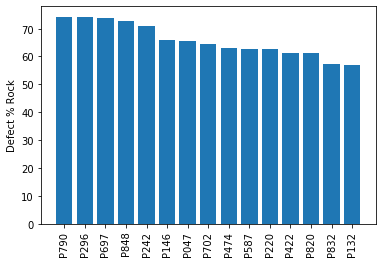

In [25]:
plt1=Report_1.copy()
plt1.reset_index(inplace=True)
Y=plt1.sort_values('Defect % Rock',ascending=False)
x=Y['Production_Unit_Id'].head(15)
y=Y['Defect % Rock'].head(15)
plt.bar(x,y)
plt.xticks(rotation=90)
plt.ylabel('Defect % Rock')
plt.show()

### 15 Production Units with maximum number of defects in paper items

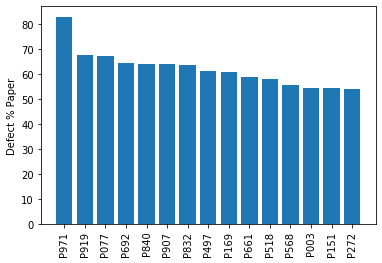

In [26]:
Y=plt1.sort_values('Defect % Paper',ascending=False)
x=Y['Production_Unit_Id'].head(15)
y=Y['Defect % Paper'].head(15)
plt.bar(x,y)
plt.xticks(rotation=90)
plt.ylabel('Defect % Paper')
plt.show()

### 15 Production Units with maximum number of defects in scissor items

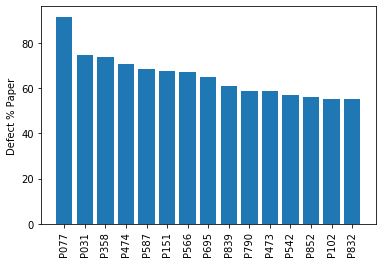

In [27]:
Y=plt1.sort_values('Defect % Scissor',ascending=False)
x=Y['Production_Unit_Id'].head(15)
y=Y['Defect % Scissor'].head(15)
plt.bar(x,y)
plt.xticks(rotation=90)
plt.ylabel('Defect % Paper')
plt.show()

### 15 Customer Groups with maximum Number of Complaints

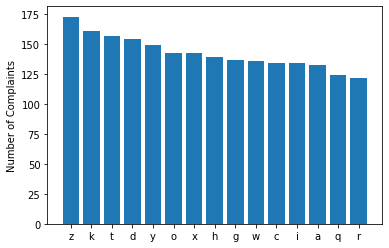

In [28]:
plt2=ans_2.copy()
plt2.reset_index(inplace=True)
Y=plt2.sort_values('Number of Complaints',ascending=False)
x=Y['Customer_Group'].head(15)
y=Y['Number of Complaints'].head(15)
plt.bar(x,y)
# plt.xticks(rotation=90)
plt.ylabel('Number of Complaints')
plt.show()

### 15 Production Units with maximum number of Total Detected Defects

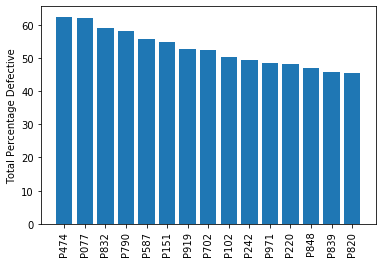

In [29]:
plt3=ans_3.copy()
plt3.reset_index(inplace=True)
Y=plt3.sort_values('% detected defects by QA',ascending=False)
x=Y['Production_Unit_Id'].head(15)
y=Y['% detected defects by QA'].head(15)
plt.bar(x,y)
plt.xticks(rotation=90)
plt.ylabel('Total Percentage Defective')
plt.show()